In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [2]:
data = pd.read_excel("Bank_personal_Loan_Modelling.xlsx",sheet_name = 1)

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
data1 = data[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']]

In [6]:
tree_model = tree.DecisionTreeClassifier()

__Random Forest__

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf_model = RandomForestClassifier(n_estimators = 1000,max_features = 2,oob_score = True)

In [9]:
features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage', 'Securities Account','CD Account','Online','CreditCard']

In [10]:
rf_model.fit(X = data1[features],y=data1["Personal Loan"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [11]:
print(rf_model.oob_score_)

0.9878


In [12]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.04421093660587543
Experience 0.04375468793256421
Income 0.3437638591009571
Family 0.09851431094244646
CCAvg 0.1777579311088216
Education 0.1701762785605242
Mortgage 0.04344523105556628
Securities Account 0.0056047426852746055
CD Account 0.054180770932272304
Online 0.008316668704134497
CreditCard 0.010274582371562762


We can consider the following:
    
1) Income

2) CCAvg

3) Education

4) Family

In [15]:
predictors = pd.DataFrame([data1['Income'],data1['CCAvg'],data1['Education'],data1['Family']]).T

In [18]:
tree_model = tree.DecisionTreeClassifier(max_depth = 10)

In [19]:
tree_model.fit(X=predictors, y = data1['Personal Loan'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
with open("Resultforbankloan.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["Income","CCAvg","Education","Family"],out_file = f)

__Dtree__
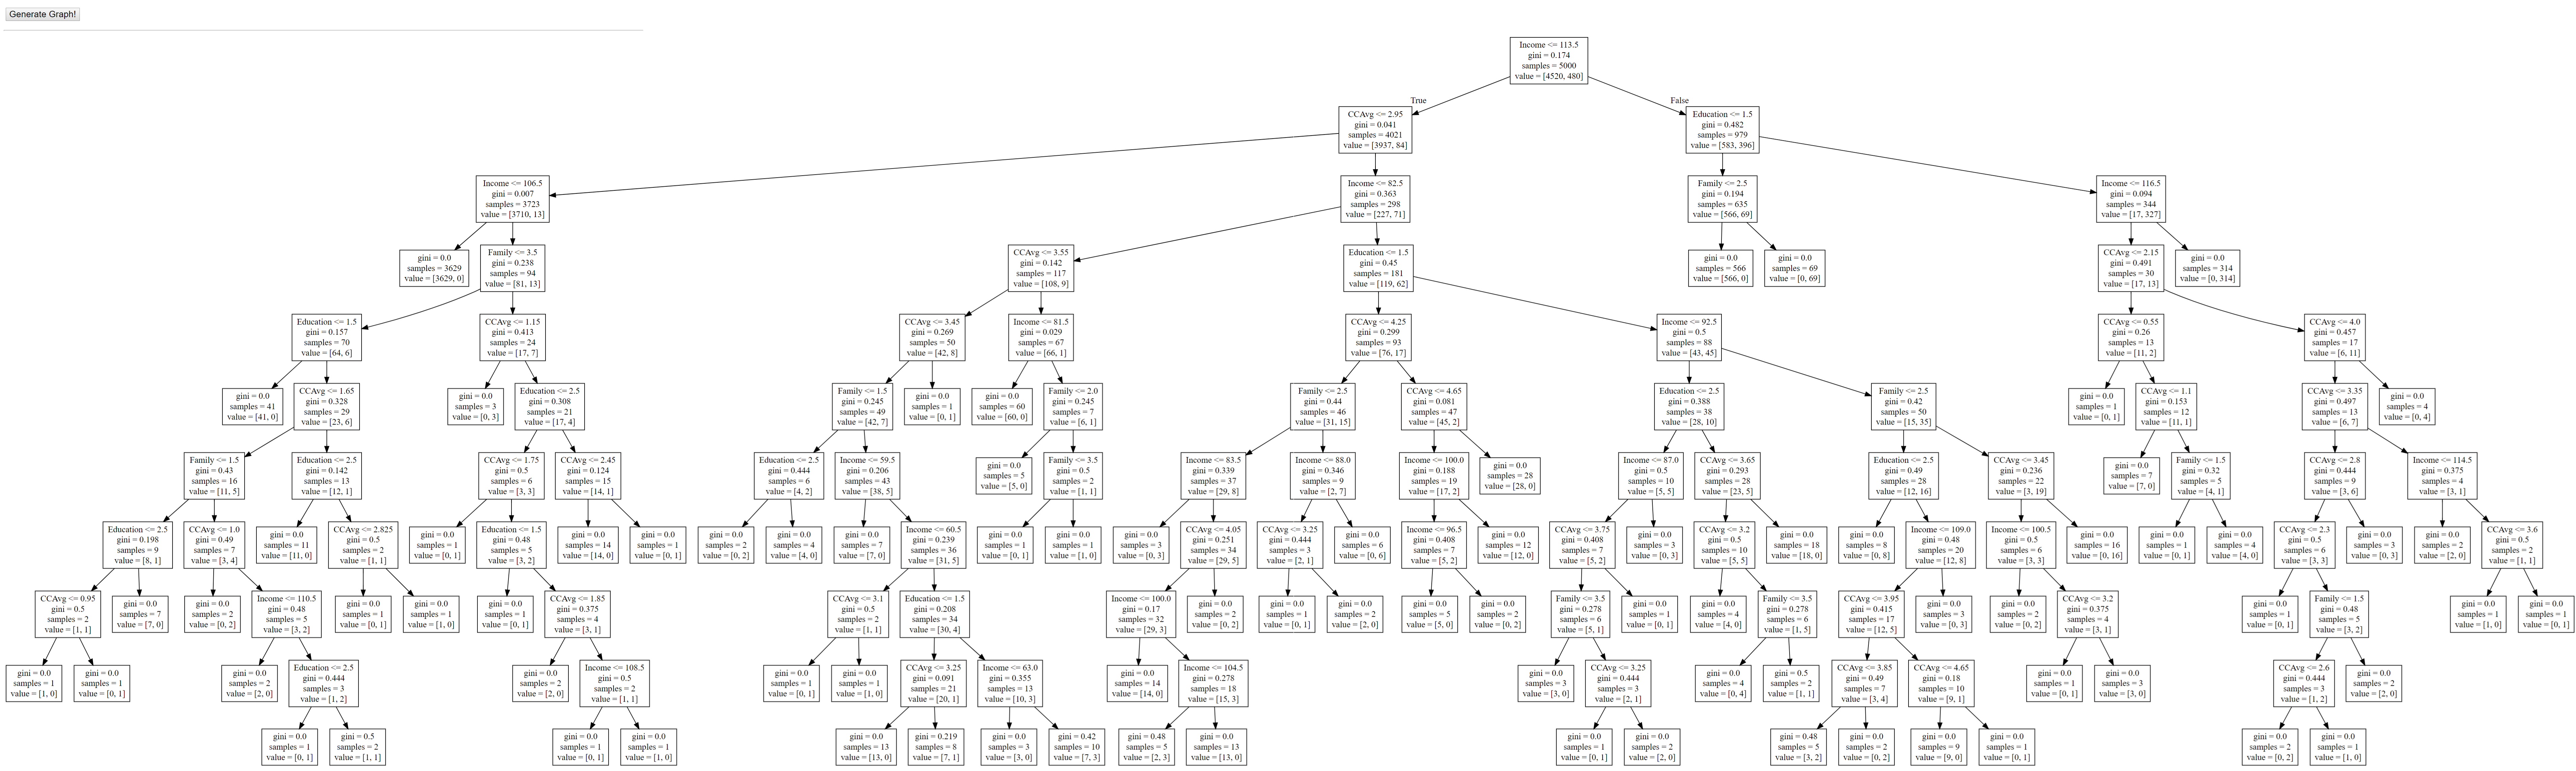

In [22]:
tree_model.score(X = predictors,y = data1["Personal Loan"])

0.998

The model is 99% accurate